In [1]:
## Guru Charan Bogireddy -8902043

In [65]:
#Import packages required
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns

In [57]:
#load Iris dataset 
iris = load_iris(as_frame=True)
print(iris)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

In [58]:
# description
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [59]:
print(list(iris))
print(iris["data"])
print(iris["target"])
print("Classes we have:", iris["target_names"])

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0     

In [22]:
X = iris.data.values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [26]:
print(y)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [63]:
#Train the model 
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [61]:
# predict the labels for all data points
y_pred = log_reg.predict(X_test)
print(y_pred)
print(y_test)

[False False  True False False False False  True False False  True False
 False False False False  True False False  True False  True False  True
  True  True  True  True False False False False False False False  True
 False False]
[False False  True False False False False  True False False  True False
 False False False False  True False False  True False  True False  True
  True  True  True  True False False False False False False False  True
 False False]


In [49]:
# Calculate metrics
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 1.0
Precision: 1.0


### Accuracy and Precision scores are 1 means the model predicted the outcomes perfectly.

In [44]:
incorrect_predictions = X_test[y_pred != y_test]
print(incorrect_predictions)

[]


### There are no incorrect predictions has we can see. <br>
#### It suggests that the model was able to perfectly separate the two classes based on the given features.
##### Possible reasons:
##### Well-defined features
##### Adequate sample size

In [50]:
confusionMatrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusionMatrix)

Confusion Matrix:
[[26  0]
 [ 0 12]]


.The top-left value, 26, represents the count of true negatives (TN). In this case, it means that the model correctly predicted 26 instances as "not virginica" when they were indeed "not virginica".

.The bottom-right value, 12, represents the count of true positives (TP). It indicates that the model correctly predicted 12 instances as "virginica" when they were indeed "virginica".

.The top-right and bottom-left values, both 0, represent the counts of false positives (FP) and false negatives (FN), respectively. In this case, a value of 0 indicates that the model did not make any incorrect predictions for those classes.

<Axes: >

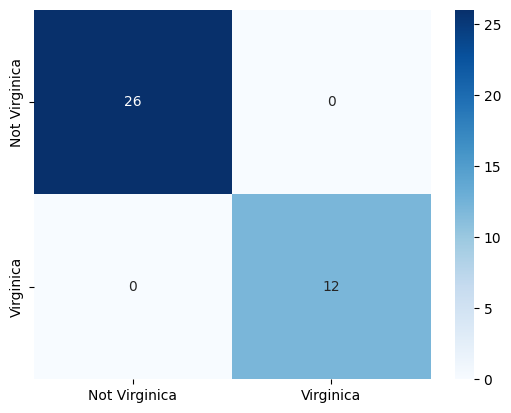

In [70]:
# Define class labels
class_labels = ["Not Virginica", "Virginica"]

# Create heatmap
sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)